In [1]:
import pandas as pd
from datetime import datetime 
import time
import numpy as np
from pandas import set_option
import seaborn as sns
from numpy import set_printoptions 
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pip install iexfinance

     |████████████████████████████████| 51kB 2.2MB/s 


In [3]:
sym = "AAPL"  
token = "pk_6b3ac6169ef64261bca98b281e6e5e93"
df_temp = pd.read_json('https://cloud.iexapis.com/stable/stock/'+sym+'/chart/1d?token='+token+'')

In [4]:
df=df_temp.drop(['close', 'high', 'low', 'volume', 'label', 'average', 'notional', 'numberOfTrades' ], axis=1)

In [5]:
df['minute']= pd.to_datetime(df['minute'])

In [6]:
df['datetime']=df.apply(lambda x:'%s %s' % (x['date'],x['minute']),axis=1)
df.drop(['date', 'datetime'], axis=1, inplace=True)

In [7]:
df.rename(columns={'minute': 'datetime'}, inplace=True)

In [8]:
df['ts'] = df.datetime.values.astype(np.int64) // 10 ** 9

In [9]:
df

,datetime,open,ts
0,2020-10-11 09:30:00,115.280,1602408600
1,2020-10-11 09:31:00,115.155,1602408660
2,2020-10-11 09:32:00,115.000,1602408720
3,2020-10-11 09:33:00,115.110,1602408780
4,2020-10-11 09:34:00,115.260,1602408840
...,...,...,...
385,2020-10-11 15:55:00,116.705,1602431700
386,2020-10-11 15:56:00,116.795,1602431760
387,2020-10-11 15:57:00,116.860,1602431820
388,2020-10-11 15:58:00,116.910,1602431880


In [11]:
df= df.drop(['datetime'], axis=1)
df

,open,ts
0,115.280,1602408600
1,115.155,1602408660
2,115.000,1602408720
3,115.110,1602408780
4,115.260,1602408840
...,...,...
385,116.705,1602431700
386,116.795,1602431760
387,116.860,1602431820
388,116.910,1602431880


In [14]:
array=df.values
X=array[:,1]
Y=array[:,0]


In [16]:
rx=array[:, 1].reshape(-1,1)

#print(rx)

val_size = 0.30
seed = 3
x_train, x_val, y_train, y_val = train_test_split(rx, Y, test_size=val_size, random_state=seed)

In [17]:
num_folds=3
seed =1
scoring='r2'

In [20]:
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(
        model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.471158 (0.083207)
 LASSO : 0.471177 (0.083064)
 EN : 0.471167 (0.083135)
 KNN : 0.910836 (0.021590)
 CART : 0.915220 (0.043692)
 SVR : 0.641386 (0.115677)


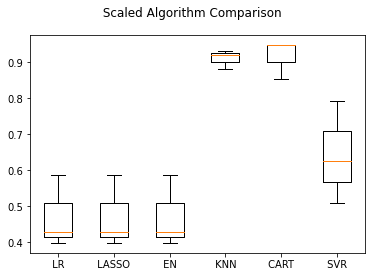

In [21]:
fig = pyplot.figure()
fig.suptitle(' Scaled Algorithm Comparison ')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [24]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(x_train, y_train)

predictions = model.predict(x_val)
print(r2_score(y_val, predictions))

0.9484304106749378


In [25]:
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, y_train)

rescaledValidationX = scaler.transform(x_val)
predictions = model.predict(rescaledValidationX)
print(r2_score(y_val, predictions))

0.9447312966014869


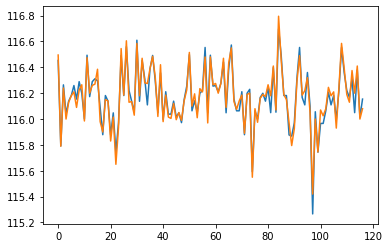

In [27]:
pyplot.plot(predictions)
pyplot.plot(y_val)

pyplot.rcParams['figure.figsize']=(50,25)
pyplot.show()

